In [1]:
"""
In order to run the code as is, you will need scipy, pandas and tqdm installed 
(although tqdm is only needed for the progress bar, and pandas is only for the autocorrelation function)
All of these can be installed (on linux) from the command interface using 'pip'
""" 

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from gibbsrank import gibbs_sample
from eprank import eprank
import pandas
from cw2 import sorted_barplot
from scipy.stats import norm, multivariate_normal

We first need to load the data, stored in "tennis_data.mat". The data consists of an array, $W$ containing the names of each player, and an array, G, containing the results of all of the matches in the season. 

In [2]:
# set seed for reproducibility
np.random.seed(0)
# load data
data = sio.loadmat('tennis_data.mat')
# Array containing the names of each player
W = data['W']
# loop over array to format more nicely
for i, player in enumerate(W):
    W[i] = player[0]
# Array of size num_games x 2. The first entry in each row is the winner of game i, the second is the loser
G = data['G'] - 1
# Number of players
M = W.shape[0]
# Number of Games
N = G.shape[0]

In [3]:
W_list = W.tolist()
for i, player in enumerate(W_list):
    player.append(i)
W_list

[['Rafael-Nadal', 0],
 ['Juan-Monaco', 1],
 ['Juan-Martin-Del-Potro', 2],
 ['Mardy-Fish', 3],
 ['Roger-Federer', 4],
 ['Jo-Wilfried-Tsonga', 5],
 ['Guillermo-Garcia-Lopez', 6],
 ['Florian-Mayer', 7],
 ['Milos-Raonic', 8],
 ['Santiago-Giraldo', 9],
 ['Andy-Murray', 10],
 ['Richard-Gasquet', 11],
 ['David-Nalbandian', 12],
 ['Gilles-Muller', 13],
 ['Andy-Roddick', 14],
 ['Novak-Djokovic', 15],
 ['Fernando-Verdasco', 16],
 ['Ivan-Dodig', 17],
 ['Ryan-Sweeting', 18],
 ['Radek-Stepanek', 19],
 ['John-Isner', 20],
 ['Pablo-Andujar', 21],
 ['Ivan-Ljubicic', 22],
 ['Robin-Soderling', 23],
 ['Feliciano-Lopez', 24],
 ['Marin-Cilic', 25],
 ['Marcos-Baghdatis', 26],
 ['Michael-Llodra', 27],
 ['Gael-Monfils', 28],
 ['David-Ferrer', 29],
 ['Jarkko-Nieminen', 30],
 ['Kei-Nishikori', 31],
 ['Alexandr-Dolgopolov', 32],
 ['Tomas-Berdych', 33],
 ['Somdev-K-Devvarman', 34],
 ['Ivo-Karlovic', 35],
 ['Olivier-Rochus', 36],
 ['Bernard-Tomic', 37],
 ['Karol-Beck', 38],
 ['Ernests-Gulbis', 39],
 ['Nikolay-Davy

In [4]:
colours = ['firebrick', 'teal', 'goldenrod', 'purple', 'steelblue', 'forestgreen', 'lightsteelblue']

# Task A - Gibbs Sampling

In [5]:
# number of iterations
num_iters = 1100
# perform gibbs sampling, skill samples is an num_players x num_samples array
skill_samples = gibbs_sample(G, M, num_iters)#, random_nums)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:42<00:00, 25.72it/s]


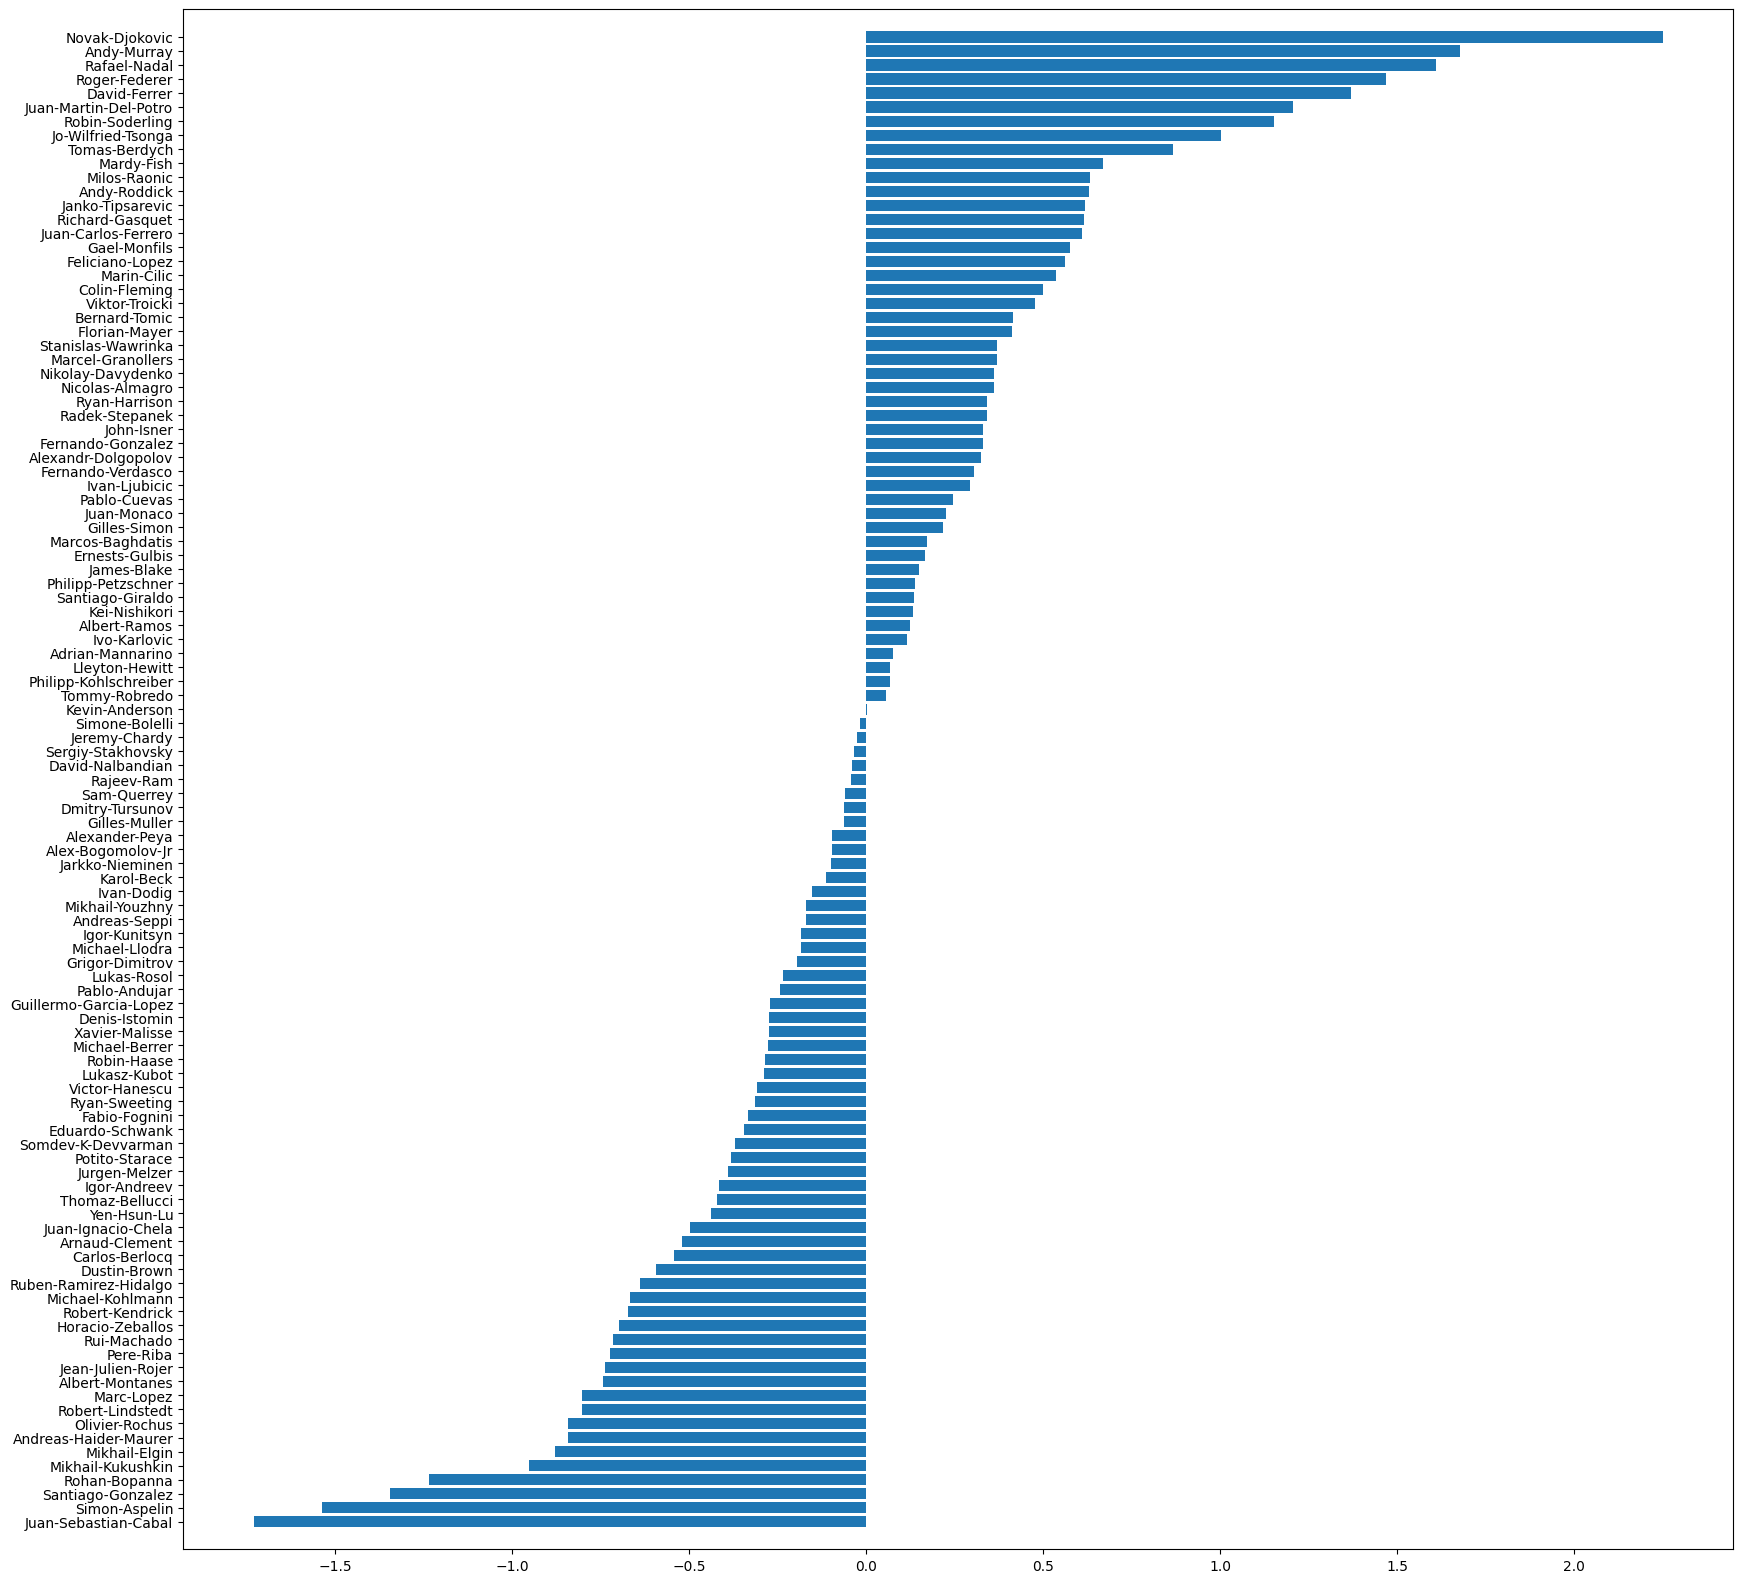

In [4]:
sorted_barplot(skill_samples[:,num_iters-1], W)

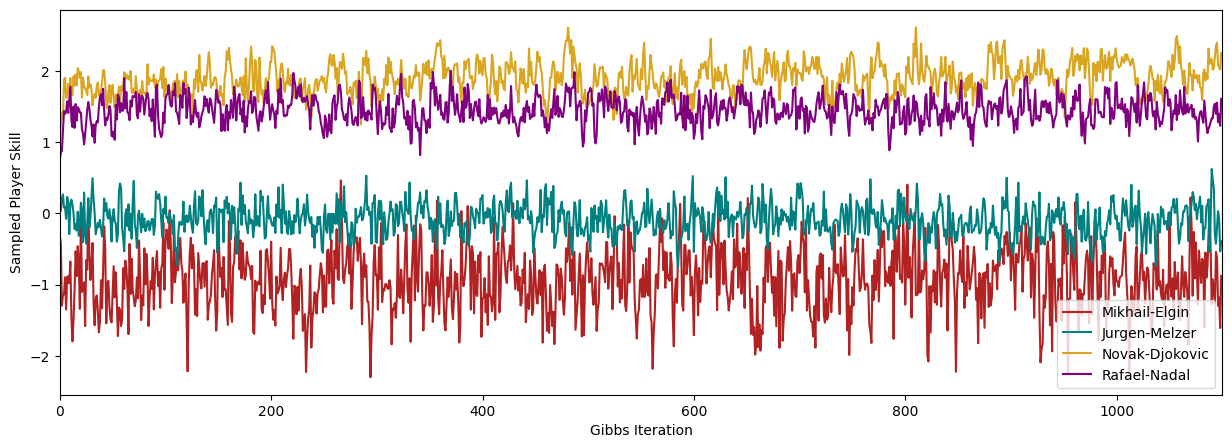

In [117]:
players = [104, 76, 15, 0]
plt.figure(figsize=(15,5))
for i, p in enumerate(players):
    plt.plot(skill_samples[p,0:num_iters], color=colours[i])

plt.xlim(0, num_iters)
plt.xlabel("Gibbs Iteration")
plt.ylabel("Sampled Player Skill")
plt.legend(W[players][:,0])

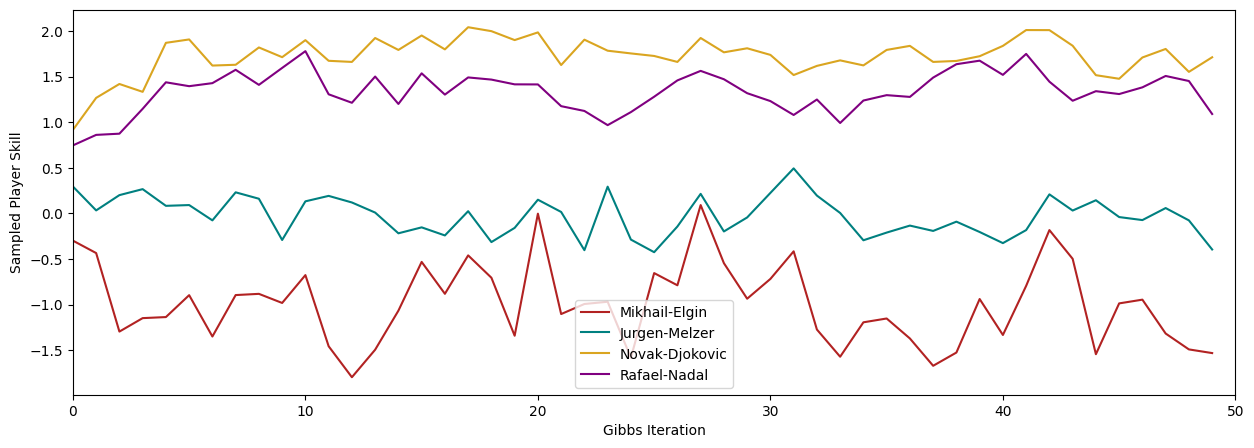

In [118]:
players = [104, 76, 15, 0]
plt.figure(figsize=(15,5))
for i, p in enumerate(players):
    plt.plot(skill_samples[p,0:50], color=colours[i])

plt.xlim(0, 50)
plt.xlabel("Gibbs Iteration")
plt.ylabel("Sampled Player Skill")
plt.legend(W[players][:,0])

In [22]:
skill_samples_running_avg = []
for i in range(1, len(skill_samples[0])+1):
    skill_samples_running_avg.append(np.mean(skill_samples[:, :i], axis=1))
skill_samples_running_avg = np.array(skill_samples_running_avg)

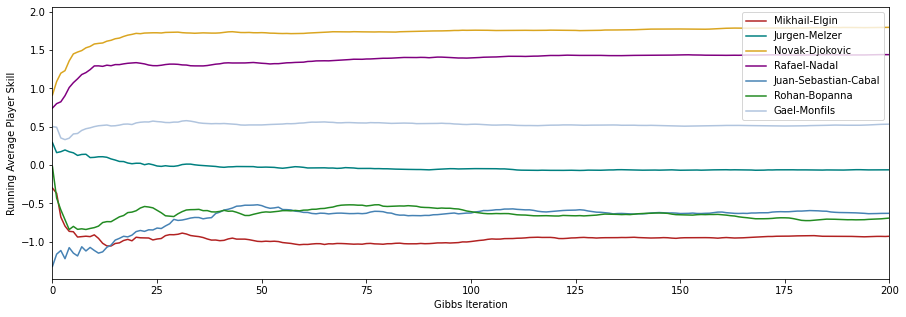

In [36]:
players = [104, 76, 15, 0, 97, 101, 28]
plt.figure(figsize=(15,5))
for i, p in enumerate(players):
    plt.plot(skill_samples_running_avg[:,p], color=colours[i])

plt.xlim(0, 200)
plt.xlabel("Gibbs Iteration")
plt.ylabel("Running Average Player Skill")
plt.legend(W[players][:,0])

Text(0, 0.5, 'Autocorrelation')

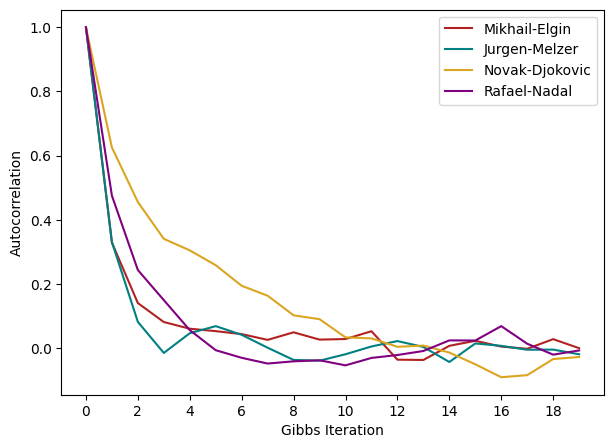

In [119]:
# Code for plotting the autocorrelation function for player p
num_vals = 20
plt.figure(figsize=(7,5))
for i, p in enumerate(players):
    autocor = np.zeros(num_vals)
    for j in range(num_vals):
        autocor[j]=pandas.Series.autocorr(pandas.Series(skill_samples[p,:]),lag=j)
    plt.plot(autocor, color=colours[i])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('Gibbs Iteration')
plt.ylabel('Autocorrelation')

# Task B - EP ranking

In [5]:
# number of iterations
num_iters = 2120
# perform gibbs sampling, skill samples is an num_players x num_samples array
skill_samples = gibbs_sample(G, M, num_iters)#, random_nums)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2120/2120 [01:20<00:00, 26.19it/s]


In [6]:
burn_in=120
thinning=10
idxs = range(burn_in, num_iters, thinning)
thinned_samples = skill_samples[:, idxs]

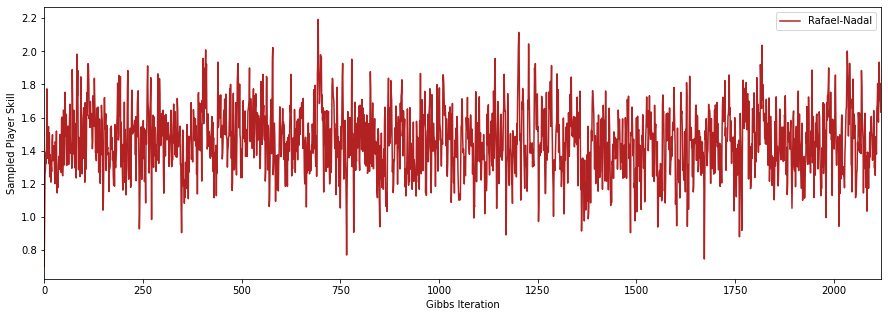

In [105]:
players = [0]
plt.figure(figsize=(15,5))
for i, p in enumerate(players):
    plt.plot(skill_samples[p], color=colours[i])

plt.xlim(0, len(skill_samples[0]))
plt.xlabel("Gibbs Iteration")
plt.ylabel("Sampled Player Skill")
plt.legend(W[players][:,0])

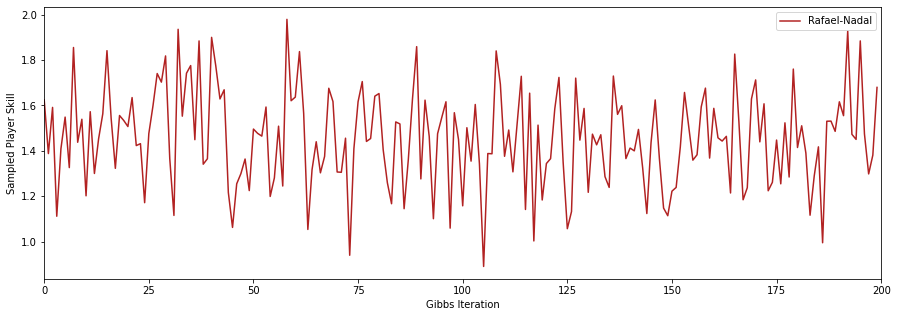

In [106]:
players = [0]
plt.figure(figsize=(15,5))
for i, p in enumerate(players):
    plt.plot(thinned_samples[p], color=colours[i])

plt.xlim(0, len(thinned_samples[0]))
plt.xlabel("Gibbs Iteration")
plt.ylabel("Sampled Player Skill")
plt.legend(W[players][:,0])

In [107]:
len(thinned_samples[0]), len(skill_samples[0])

(200, 2120)

In [138]:
i1 = int(0.1 * len(thinned_samples[0]))
i2 = int(0.5 * len(thinned_samples[0]))
print(i1, i2)

seq1 = thinned_samples[:, :i1] #first 10%
seq2 = thinned_samples[:, i2:] #last 50%

seq1.shape, seq2.shape

20 100


((107, 20), (107, 100))

In [182]:
i1 = int(0.1 * len(skill_samples[0]))
i2 = int(0.5 * len(skill_samples[0]))
print(i1, i2)

seq1 = skill_samples[:, :i1] #first 10%
seq2 = skill_samples[:, i2:] #last 50%

seq1.shape, seq2.shape

212 1060


((107, 212), (107, 1060))

In [183]:
m1, m2 = np.mean(seq1, axis=1), np.mean(seq2, axis=1)
v1, v2 = np.var(seq1, axis=1), np.var(seq2, axis=1)
geweke_z_score = (m1 - m2) / np.sqrt(v1 + v2)

In [184]:
len(geweke_z_score)

107

(0.0, 107.0)

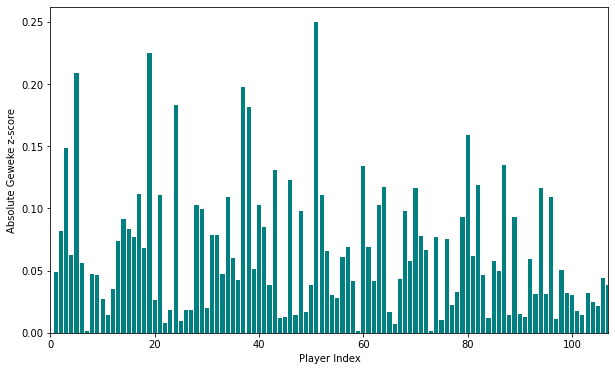

In [185]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, M+1), abs(geweke_z_score), color=colours[1])
plt.xlabel('Player Index'); plt.ylabel('Absolute Geweke z-score')
plt.xlim(0, M)

In [8]:
mean_over_iterations = []
precision_over_iterations = []
for i in range(20):
    # run message passing algorithm, returns mean and precision for each player
    mean_player_skills, precision_player_skills = eprank(G, M, i+1)
    mean_over_iterations.append(mean_player_skills)
    precision_over_iterations.append(precision_player_skills)
mean_over_iterations = np.array(mean_over_iterations)
precision_over_iterations = np.array(precision_over_iterations)

In [124]:
players = [104, 76, 15, 0, 97, 101, 28]

Text(0, 0.5, 'Player Skill Mean')

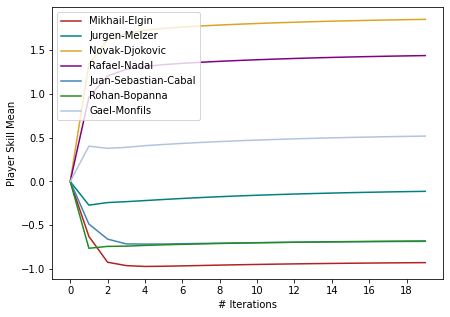

In [167]:
num_vals = 20
plt.figure(figsize=(7,5))
for i, p in enumerate(players):
    plt.plot(mean_over_iterations[:,p], color=colours[i])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('# Iterations')
plt.ylabel('Player Skill Mean')

Text(0, 0.5, 'Player Skill Precision')

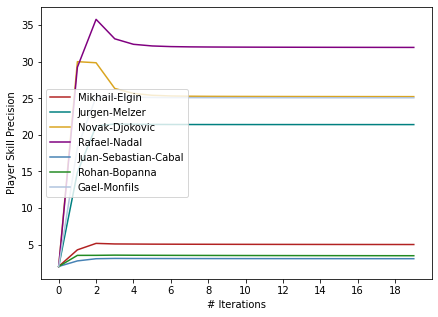

In [126]:
num_vals = 20
plt.figure(figsize=(7,5))
for i, p in enumerate(players):
    plt.plot(precision_over_iterations[:,p], color=colours[i])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('# Iterations')
plt.ylabel('Player Skill Precision')

In [148]:
abs_change_means = []
abs_change_precisions = []
for i in range(1, len(mean_over_iterations)):
    change_mean = abs(mean_over_iterations[:][i] - mean_over_iterations[:][i-1])
    change_prec = abs(precision_over_iterations[:][i] - precision_over_iterations[:][i-1])
    abs_change_means.append(change_mean)
    abs_change_precisions.append(change_prec)
abs_change_means = np.array(abs_change_means)
abs_change_precisions = np.array(abs_change_precisions)

(0.0, 8.0)

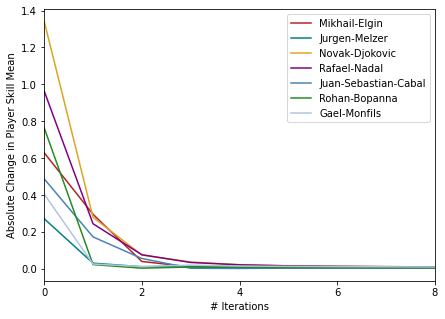

In [174]:
num_vals = 20
plt.figure(figsize=(7,5))
for i, p in enumerate(players):
    plt.plot(abs_change_means[:,p], color=colours[i])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('# Iterations')
plt.ylabel('Absolute Change in Player Skill Mean')
plt.xlim(0, 8)

(0.0, 0.08)

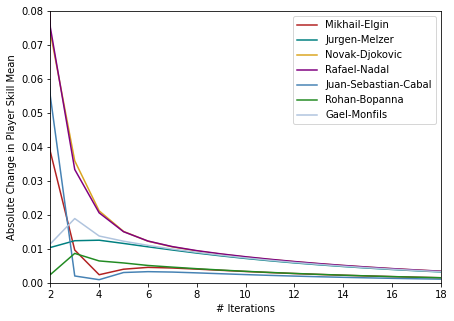

In [175]:
num_vals = 20
plt.figure(figsize=(7,5))
for i, p in enumerate(players):
    plt.plot(abs_change_means[:,p], color=colours[i])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('# Iterations')
plt.ylabel('Absolute Change in Player Skill Mean')
plt.xlim(2, 18)
plt.ylim(0, 0.08)

(0.0, 8.0)

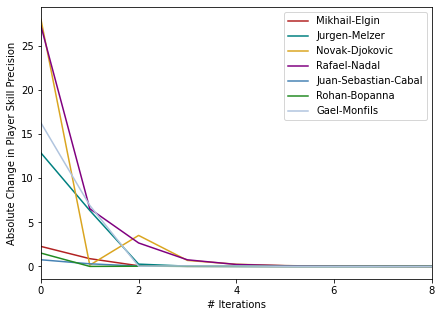

In [177]:
num_vals = 20
plt.figure(figsize=(7,5))
for i, p in enumerate(players):
    plt.plot(abs_change_precisions[:,p], color=colours[i])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('# Iterations')
plt.ylabel('Absolute Change in Player Skill Precision')
plt.xlim(0, 8)

(0.0, 0.08)

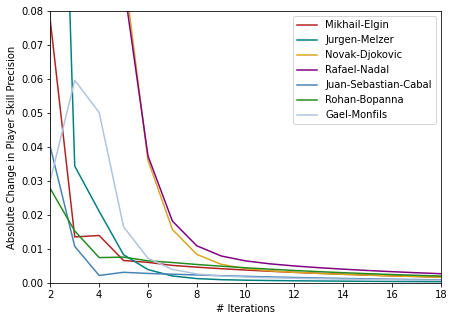

In [176]:
num_vals = 20
plt.figure(figsize=(7,5))
for i, p in enumerate(players):
    plt.plot(abs_change_precisions[:,p], color=colours[i])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('# Iterations')
plt.ylabel('Absolute Change in Player Skill Precision')
plt.xlim(2, 18)
plt.ylim(0, 0.08)

# Task C

Top four players from ATP ranking (lecture notes):
- Djokovic ~ 15
- Nadal ~ 0
- Federer ~ 4
- Murray ~ 10

In [7]:
top_four = [15, 0, 4, 10]

In [9]:
skills_probs = np.zeros((4,4))
wins_probs = np.zeros((4,4))

for i in range(4):
    for j in range(4):
        if i == j:
            continue
        m1 = mean_player_skills[top_four[i]]
        m2 = mean_player_skills[top_four[j]]
        p1 = precision_player_skills[top_four[i]]
        p2 = precision_player_skills[top_four[j]]
        m = m2 - m1
        var = 1/p1 + 1/p2
        skills_probs[i,j] = 1 - norm.cdf(m/var**0.5)
        wins_probs[i,j] = 1 - norm.cdf(m/(var+1)**0.5)
        
print(skills_probs)
print(wins_probs)

[[0.         0.94003266 0.90896222 0.98529688]
 [0.05996734 0.         0.42664832 0.76577644]
 [0.09103778 0.57335168 0.         0.81054383]
 [0.01470312 0.23422356 0.18945617 0.        ]]
[[0.         0.65548671 0.63803062 0.71970836]
 [0.34451329 0.         0.48152202 0.57284519]
 [0.36196938 0.51847798 0.         0.59074001]
 [0.28029164 0.42715481 0.40925999 0.        ]]


# Task D

#### Djokovic vs Nadal

Marginal Skills by Gaussian

Djokovic mean: 1.923389420168167
Djokovic std: 0.2195337000728826
Nadal mean: 1.4799294043544124
Nadal std: 0.1893207018283727
P(s1>s2)= 0.9369597167216124


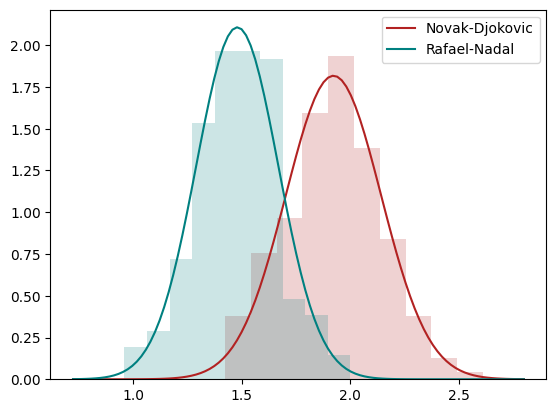

In [8]:
means = np.zeros(2)
stds = np.zeros(2)
data = []

for i in range(2):
    data.append(thinned_samples[top_four[i]])
    means[i]=np.mean(thinned_samples[top_four[i]])
    stds[i]=np.std(thinned_samples[top_four[i]])
    
data = np.array(data)
    
print('Djokovic mean:', means[0])
print('Djokovic std:', stds[0])
print('Nadal mean:', means[1])
print('Nadal std:', stds[1])

mean = means[0]-means[1]
var = stds[0]**2 + stds[1]**2
skillprob = 1 - norm.cdf((0-mean)/(var**0.5))
print('P(s1>s2)=', skillprob)

x=np.linspace(means[1]-4*stds[1],means[0]+4*stds[0],100)
y1=norm.pdf(x,means[0],stds[0])
y2=norm.pdf(x,means[1],stds[1])
plt.hist(thinned_samples[top_four[0]], density=True, color='firebrick', alpha=0.2)
plt.plot(x,y1, label=W[top_four[0]][0], color='firebrick')
plt.hist(thinned_samples[top_four[1]], density=True, color='teal', alpha=0.2)
plt.plot(x,y2, label=W[top_four[1]][0], color='teal')
plt.legend()

Joint Skills by Gaussian

In [9]:
cov = np.cov(data[0], data[1])
cov

array([[0.04843723, 0.00967763],
       [0.00967763, 0.03602244]])

C:\Users\jeeva\AppData\Local\Temp\ipykernel_8712\1608748937.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  cs = ax.contour(x, y, rv.pdf(pos), cmap="cool", label='Joint Distribution', levels=7)


Text(0, 0.5, 'Nadal Skill')

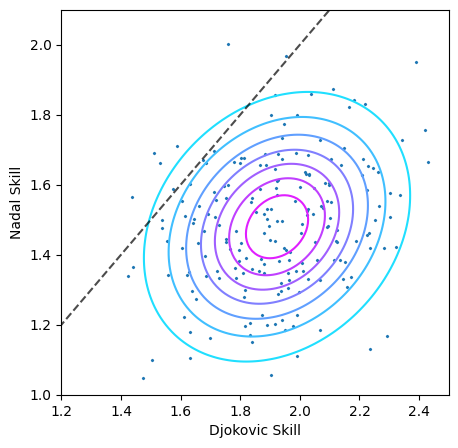

In [10]:
lower = 1
upper = 2.5
x, y = np.mgrid[1:2.5:.01, 1:2.5:.01]
x1 = np.arange(1, 2.5, 0.1)
pos = np.dstack((x, y))
rv = multivariate_normal(means, cov)
fig = plt.figure(figsize=((5,5)))
ax = fig.add_subplot(111)
cs = ax.contour(x, y, rv.pdf(pos), cmap="cool", label='Joint Distribution', levels=7)
ax.scatter(data[0], data[1], marker="x", s=2, label='Samples')
plt.plot(x1, x1, color='black', linestyle='--', alpha=0.7, label='skill1 = skill2')
plt.xlim(1.2, upper)
plt.ylim(lower, 2.1)
plt.xlabel("Djokovic Skill")
plt.ylabel("Nadal Skill")

In [15]:
it = 50000
count=0
for _ in range(it):
    sample = rv.rvs()
    if sample[0]>sample[1]:
        count+=1
prob = count/it
print('P(s1>s2)=', prob)

P(s1>s2)= 0.95928


Directly from samples

In [25]:
# number of iterations
num_iters2 = 5120
# perform gibbs sampling, skill samples is an num_players x num_samples array
skill_samples2 = gibbs_sample(G, M, num_iters2)#, random_nums)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5120/5120 [03:17<00:00, 25.97it/s]


In [26]:
idxs2 = range(burn_in, num_iters2, thinning)
thinned_samples2 = skill_samples2[:, idxs2]

In [27]:
means2 = np.zeros(2)
stds2 = np.zeros(2)
data2 = []

for i in range(2):
    data2.append(thinned_samples2[top_four[i]])
    means2[i]=np.mean(thinned_samples2[top_four[i]])
    stds2[i]=np.std(thinned_samples2[top_four[i]])
    
data2 = np.array(data2)

In [28]:
count = 0
for i in range(len(data2[0])):
    if data2[0][i] > data2[1][i]:
        count += 1
prob = count/len(data2[0])
print('P(s1>s2)=', prob)

P(s1>s2)= 0.956


In [41]:
probabilities = []
for i in range(1, len(data2[0])):
    count = 0
    for j in range(len(data2[0][:i])):
        if data2[0][j] > data2[1][j]:
            count += 1
    probabilities.append(count/len(data2[0][:i]))
probabilities = np.array(probabilities)

Text(0.5, 0, 'Number of Gibbs Samples')

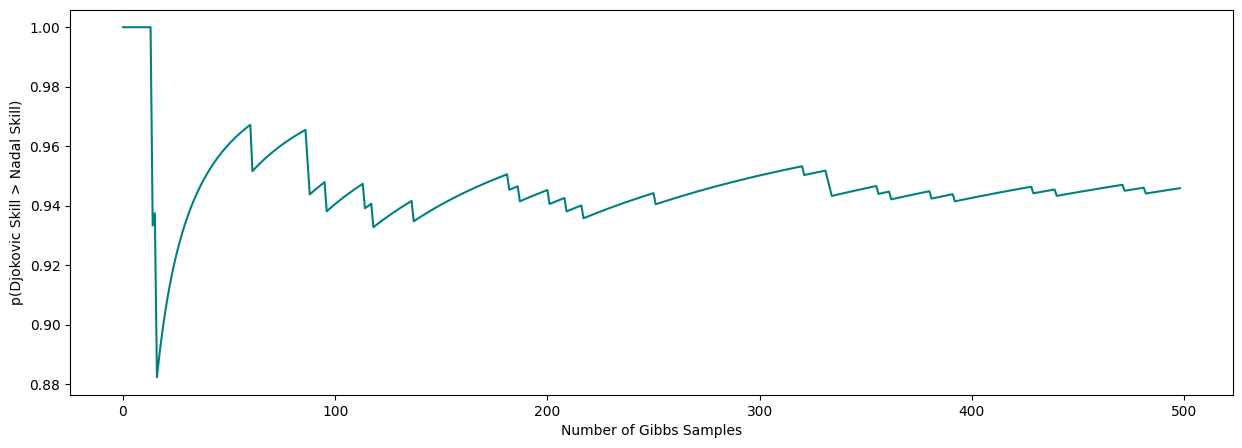

In [52]:
plt.figure(figsize=(15,5))
plt.plot(probabilities, color=colours[1])
plt.ylabel('p(Djokovic Skill > Nadal Skill)')
plt.xlabel('Number of Gibbs Samples')

In [49]:
count = 0
for i in range(len(data[0])):
    if data[0][i] > data[1][i]:
        count += 1
prob = count/len(data[0])
print('P(s1>s2)=', prob)

P(s1>s2)= 0.965


Using the best method from above, derive a 4 by 4 table for the skills,
and compare to the message passing algorithm.

Use joint distributions

In [56]:
top4_samples = np.zeros((4, len(idxs)))
top4_means = np.zeros(4)

for i, p in enumerate(top_four):
    p_samples = thinned_samples[p]
    top4_samples[i] = p_samples
    top4_means[i] = np.mean(p_samples)

In [57]:
top4_means

array([1.92338942, 1.4799294 , 1.53918277, 1.29245412])

In [59]:
it = 100000
for i, player1 in enumerate(top_four[:3]):
    for j, player2 in enumerate(top_four[i+1:]):
        print(i, j+i+1)
        rv_mean = top4_means[[i, j+i+1]]
        rv_cov = np.cov(top4_samples[i], top4_samples[j+i+1])
        rv = multivariate_normal(rv_mean, rv_cov)
        count = 0
        for _ in range(it):
            sample = rv.rvs()
            if sample[0]>sample[1]:
                count+=1
        prob = count/it
        print(f'P({player1} > {player2}) = {prob}')

0 1
P(15 > 0) = 0.95899
0 2
P(15 > 4) = 0.93661
0 3
P(15 > 10) = 0.98731
1 2
P(0 > 4) = 0.41482
1 3
P(0 > 10) = 0.76428
2 3
P(4 > 10) = 0.80379


In [36]:
num_samples = len(idxs2)
for i, player1 in enumerate(top_four[:3]):
    for player2 in top_four[i+1:]:
        count = 0
        for k in range(num_samples):
            if thinned_samples2[player1][k] > thinned_samples2[player2][k]:
                count += 1
        prob = count/num_samples
        print(f'P({player1} > {player2}) = {prob}')

P(15 > 0) = 0.956
P(15 > 4) = 0.926
P(15 > 10) = 0.99
P(0 > 4) = 0.416
P(0 > 10) = 0.77
P(4 > 10) = 0.8


Top four players from ATP ranking (lecture notes):
- Djokovic ~ 15
- Nadal ~ 0
- Federer ~ 4
- Murray ~ 10

# Task E

Rankings of all players

1) Empirical game outcome averages

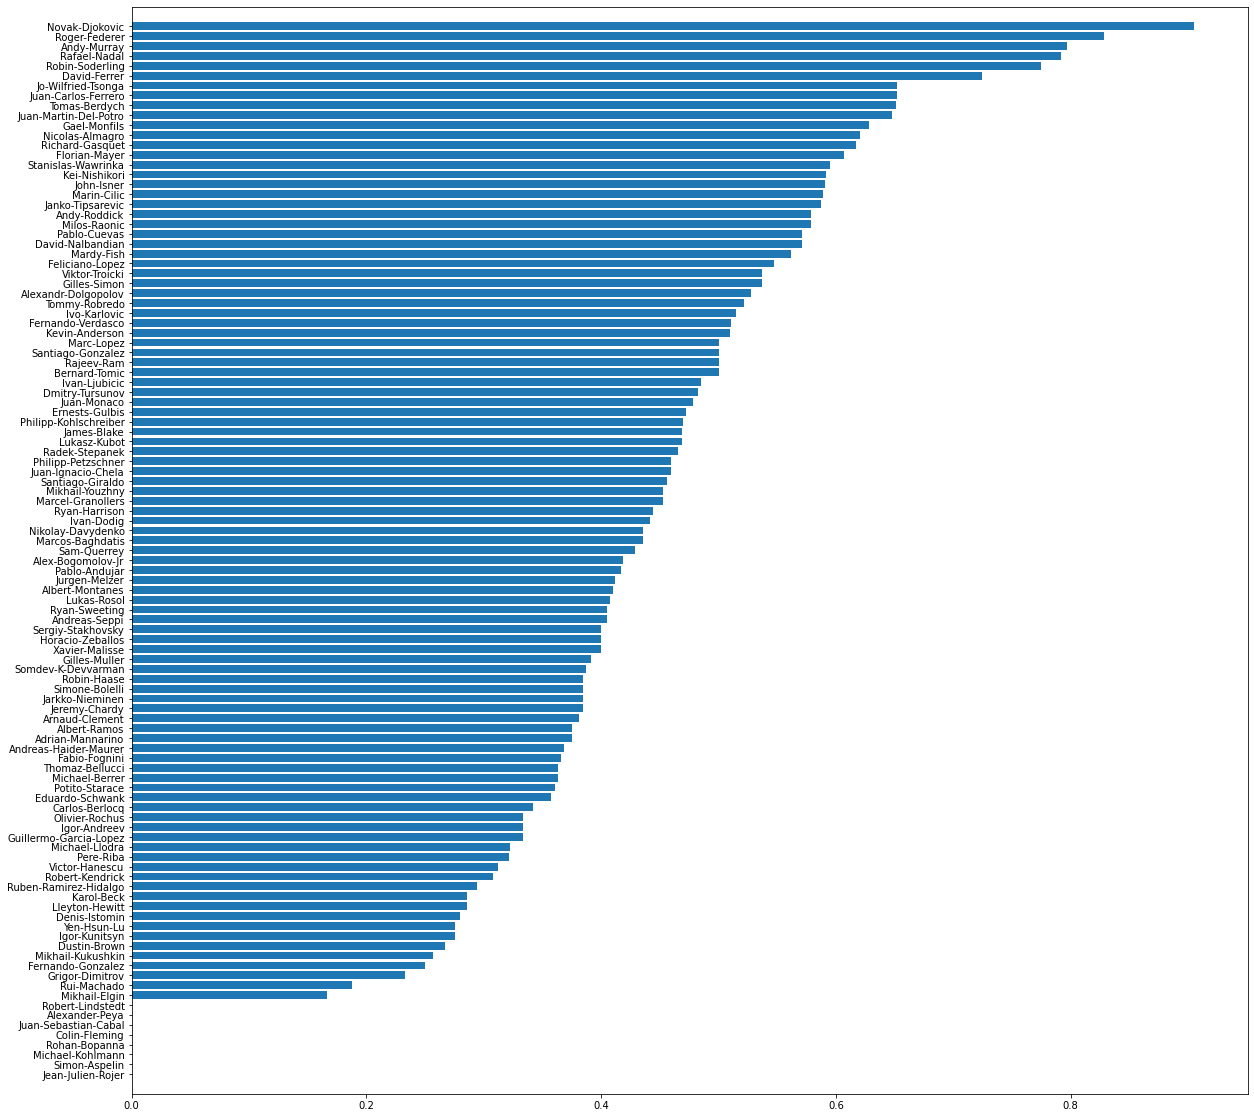

In [10]:
wins = np.zeros(M)
matches = np.zeros(M)

for match in G:
    matches[match[0]] += 1
    matches[match[1]] += 1
    wins[match[0]] +=1
    
win_ratios = np.divide(wins, matches)
sorted_barplot(win_ratios,W)

2) Gibbs sampling

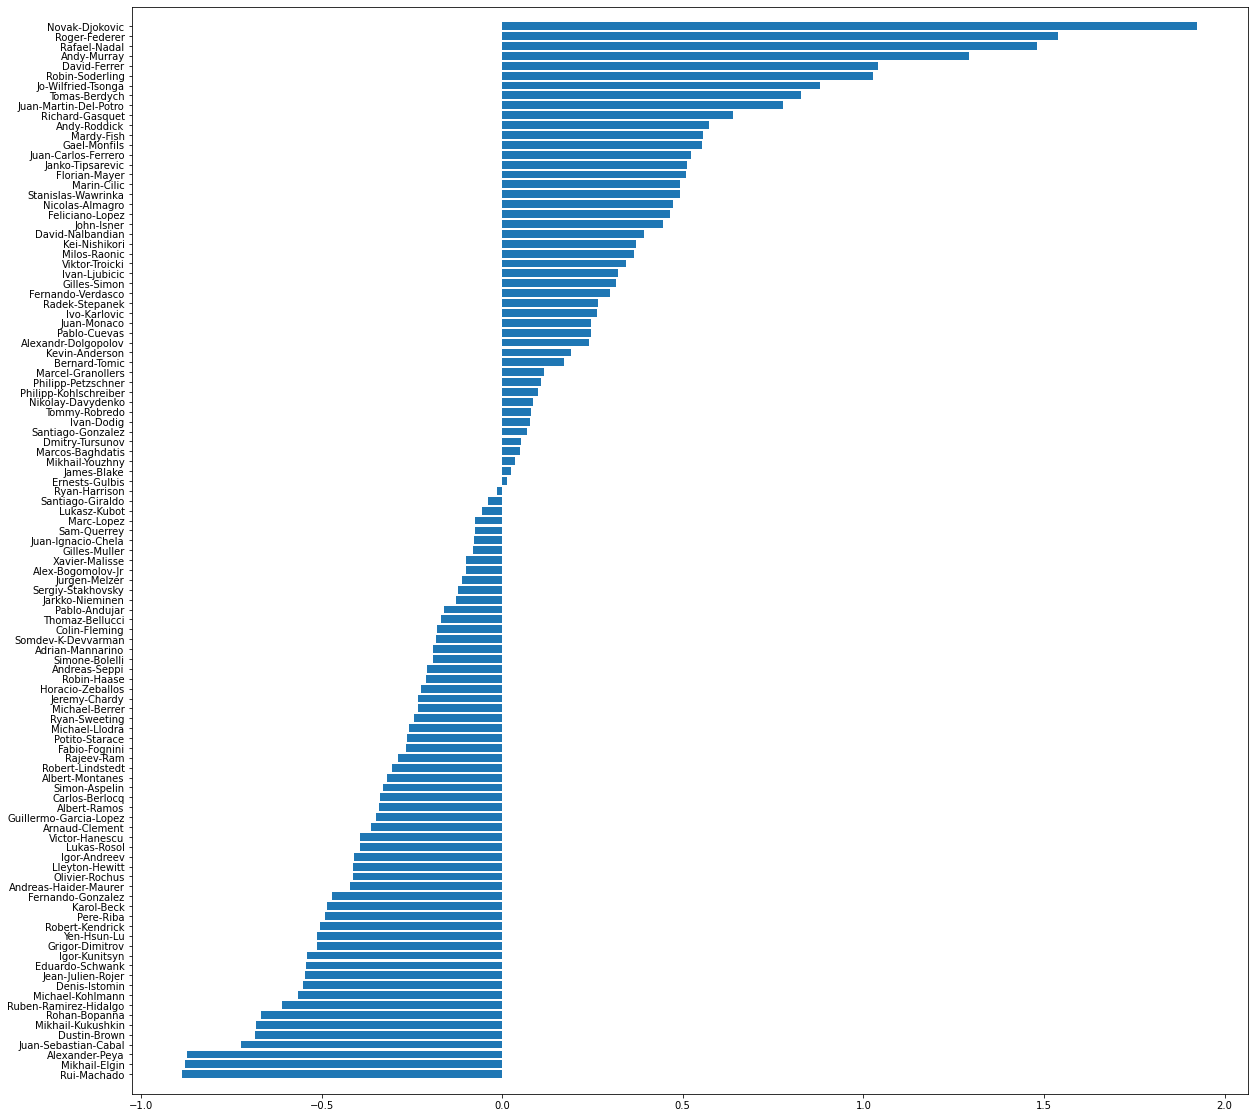

In [11]:
gibbs_means = np.mean(thinned_samples, axis=1)
sorted_barplot(gibbs_means, W)

3) Message passing

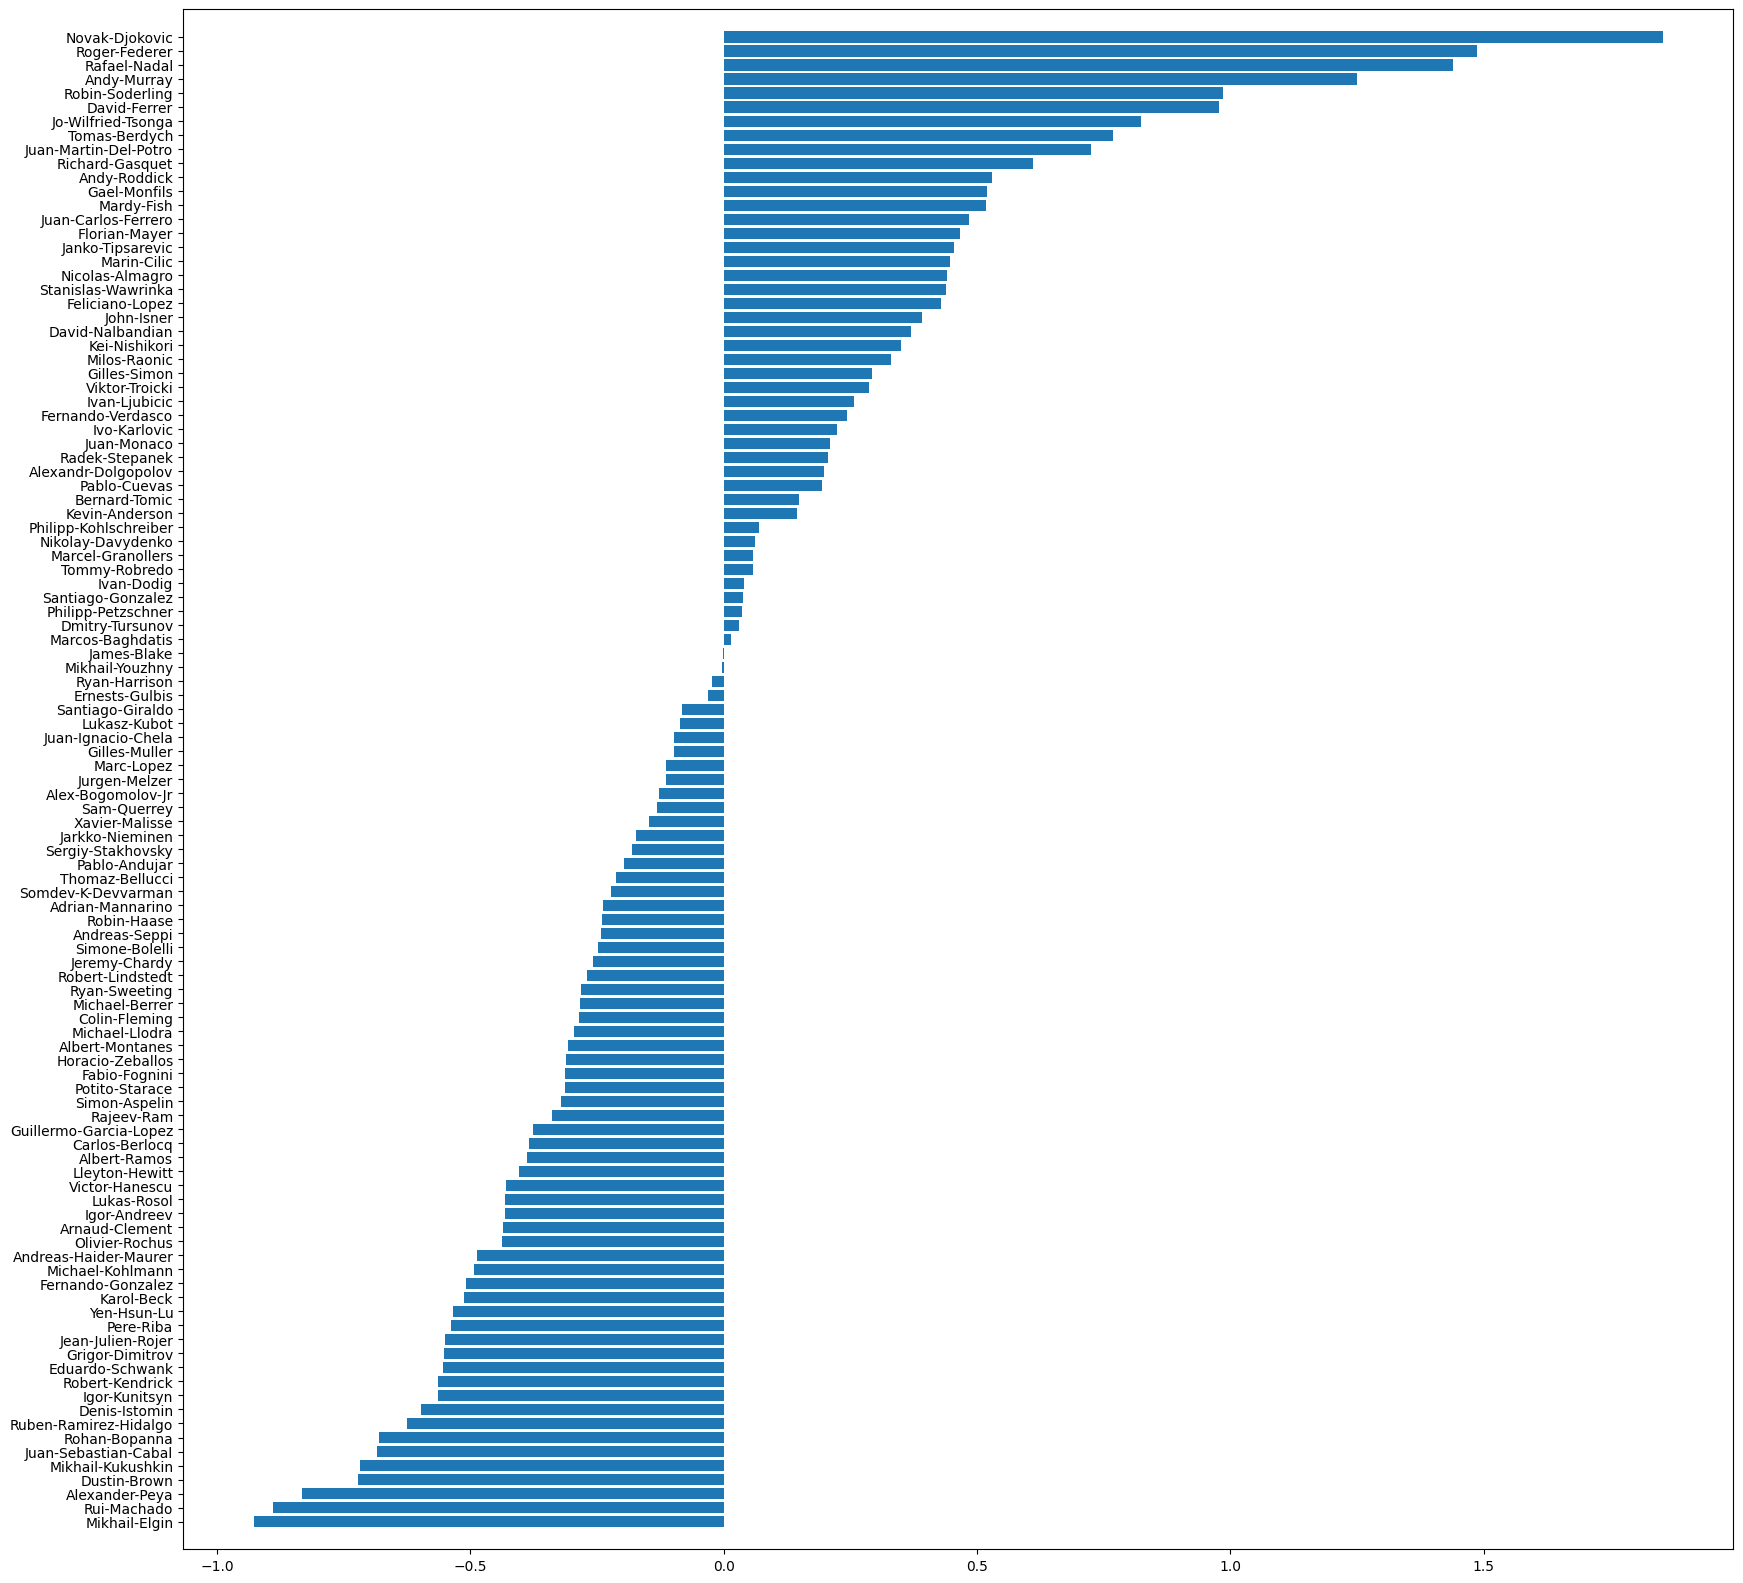

In [67]:
sorted_barplot(mean_player_skills,W)

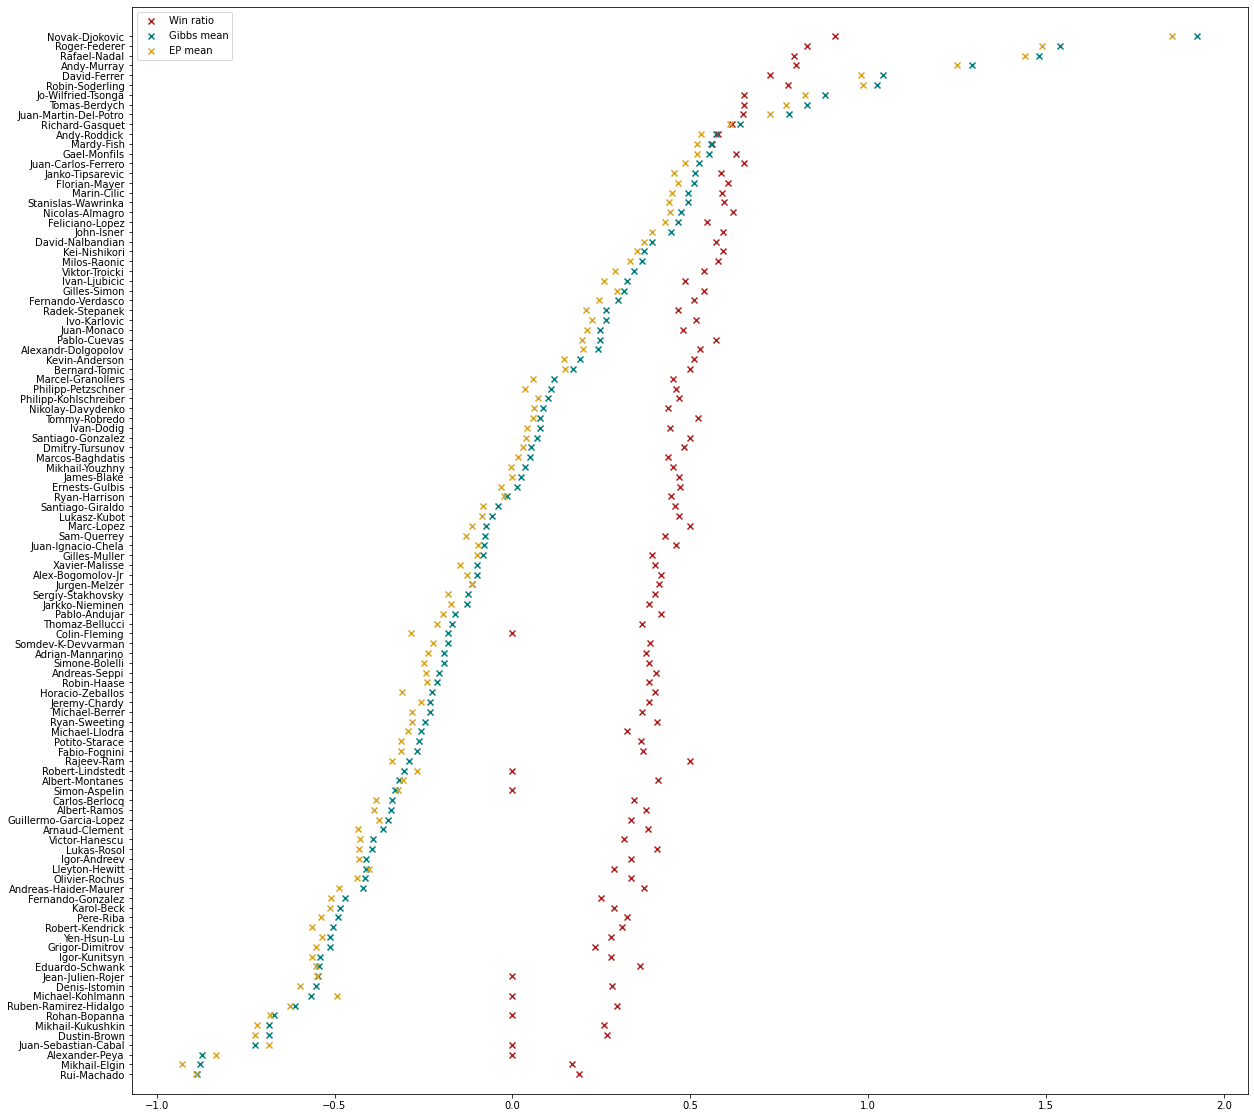

In [12]:
gibbs_rankings = np.argsort(gibbs_means)
sorted_names = W[gibbs_rankings]

xx = np.linspace(0, len(mean_player_skills)-1, len(mean_player_skills))
plt.figure(figsize=(20, 20))
plt.scatter(win_ratios[gibbs_rankings], xx, marker="x", color="firebrick", label="Win ratio")
plt.scatter(gibbs_means[gibbs_rankings], xx, marker="x", color="teal", label="Gibbs mean")
plt.scatter(mean_player_skills[gibbs_rankings], xx, marker="x", color="goldenrod", label="EP mean")
plt.yticks(xx, labels=sorted_names[:, 0])
plt.ylim([-2, 109])
plt.legend()

In [14]:
ep_std = np.sqrt(np.true_divide(1, precision_player_skills))
gibbs_std = np.std(thinned_samples, axis=1)

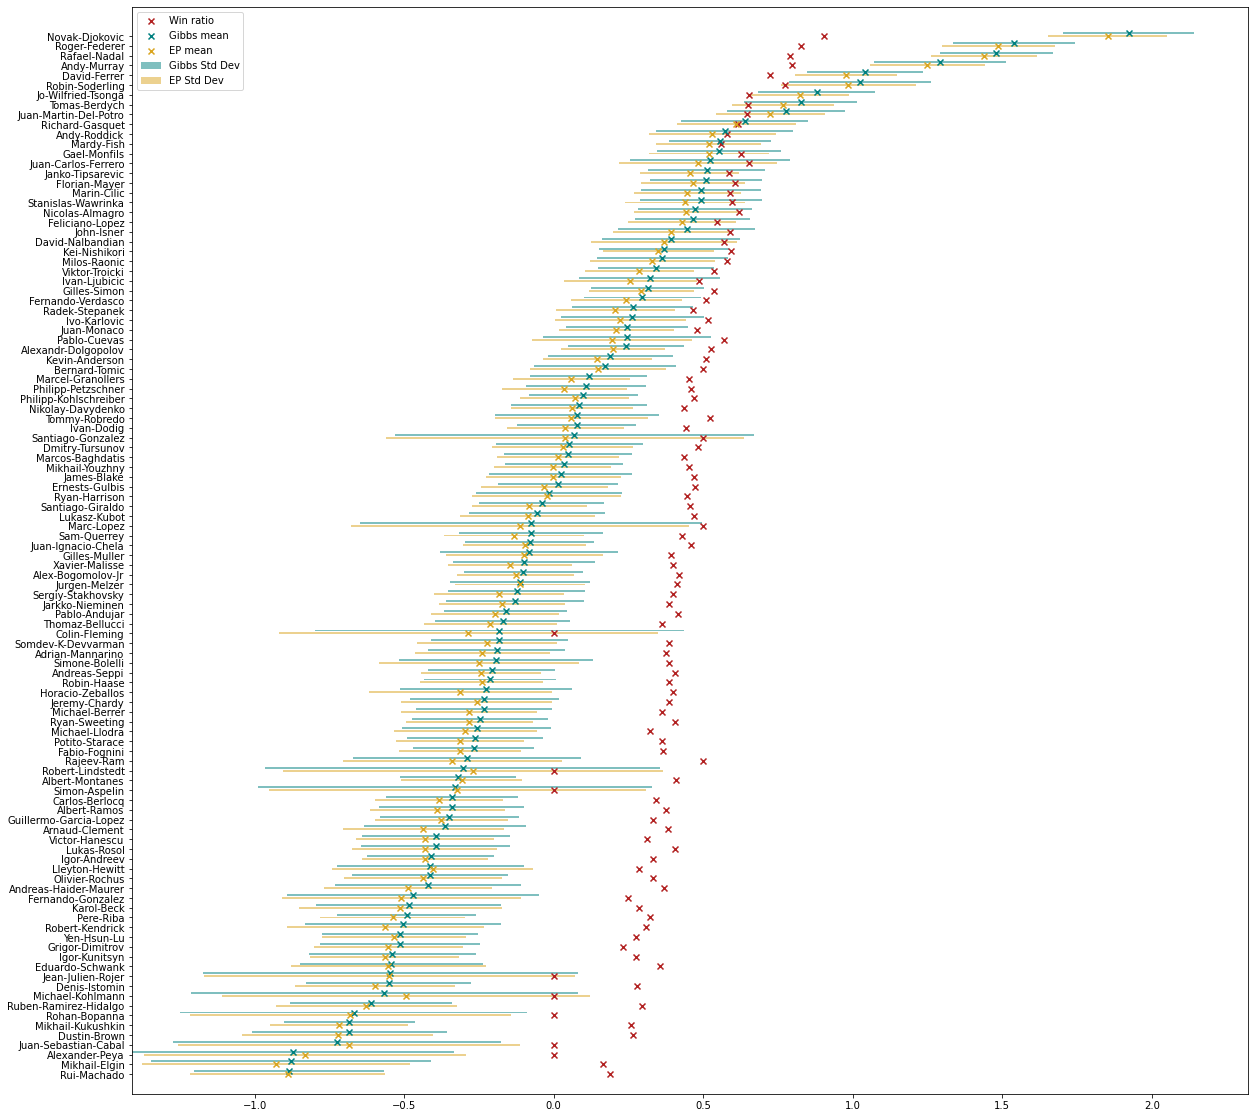

In [24]:
gibbs_rankings = np.argsort(gibbs_means)
sorted_names = W[gibbs_rankings]

xx = np.linspace(0, len(mean_player_skills)-1, len(mean_player_skills))
plt.figure(figsize=(20, 20))

plt.barh(xx+0.3, height=0.2, width=2*gibbs_std[gibbs_rankings], left=gibbs_means[gibbs_rankings] - gibbs_std[gibbs_rankings], label="Gibbs Std Dev", color='teal', alpha=0.5)
plt.barh(xx, height=0.2, width=2*ep_std[gibbs_rankings], left=mean_player_skills[gibbs_rankings]-ep_std[gibbs_rankings], label="EP Std Dev", color='goldenrod', alpha=0.5)

plt.scatter(win_ratios[gibbs_rankings], xx, marker="x", color="firebrick", label="Win ratio")
plt.scatter(gibbs_means[gibbs_rankings], xx+0.3, marker="x", color="teal", label="Gibbs mean")
plt.scatter(mean_player_skills[gibbs_rankings], xx, marker="x", color="goldenrod", label="EP mean")
plt.yticks(xx, labels=sorted_names[:, 0])
plt.ylim([-2, 109])
plt.legend()

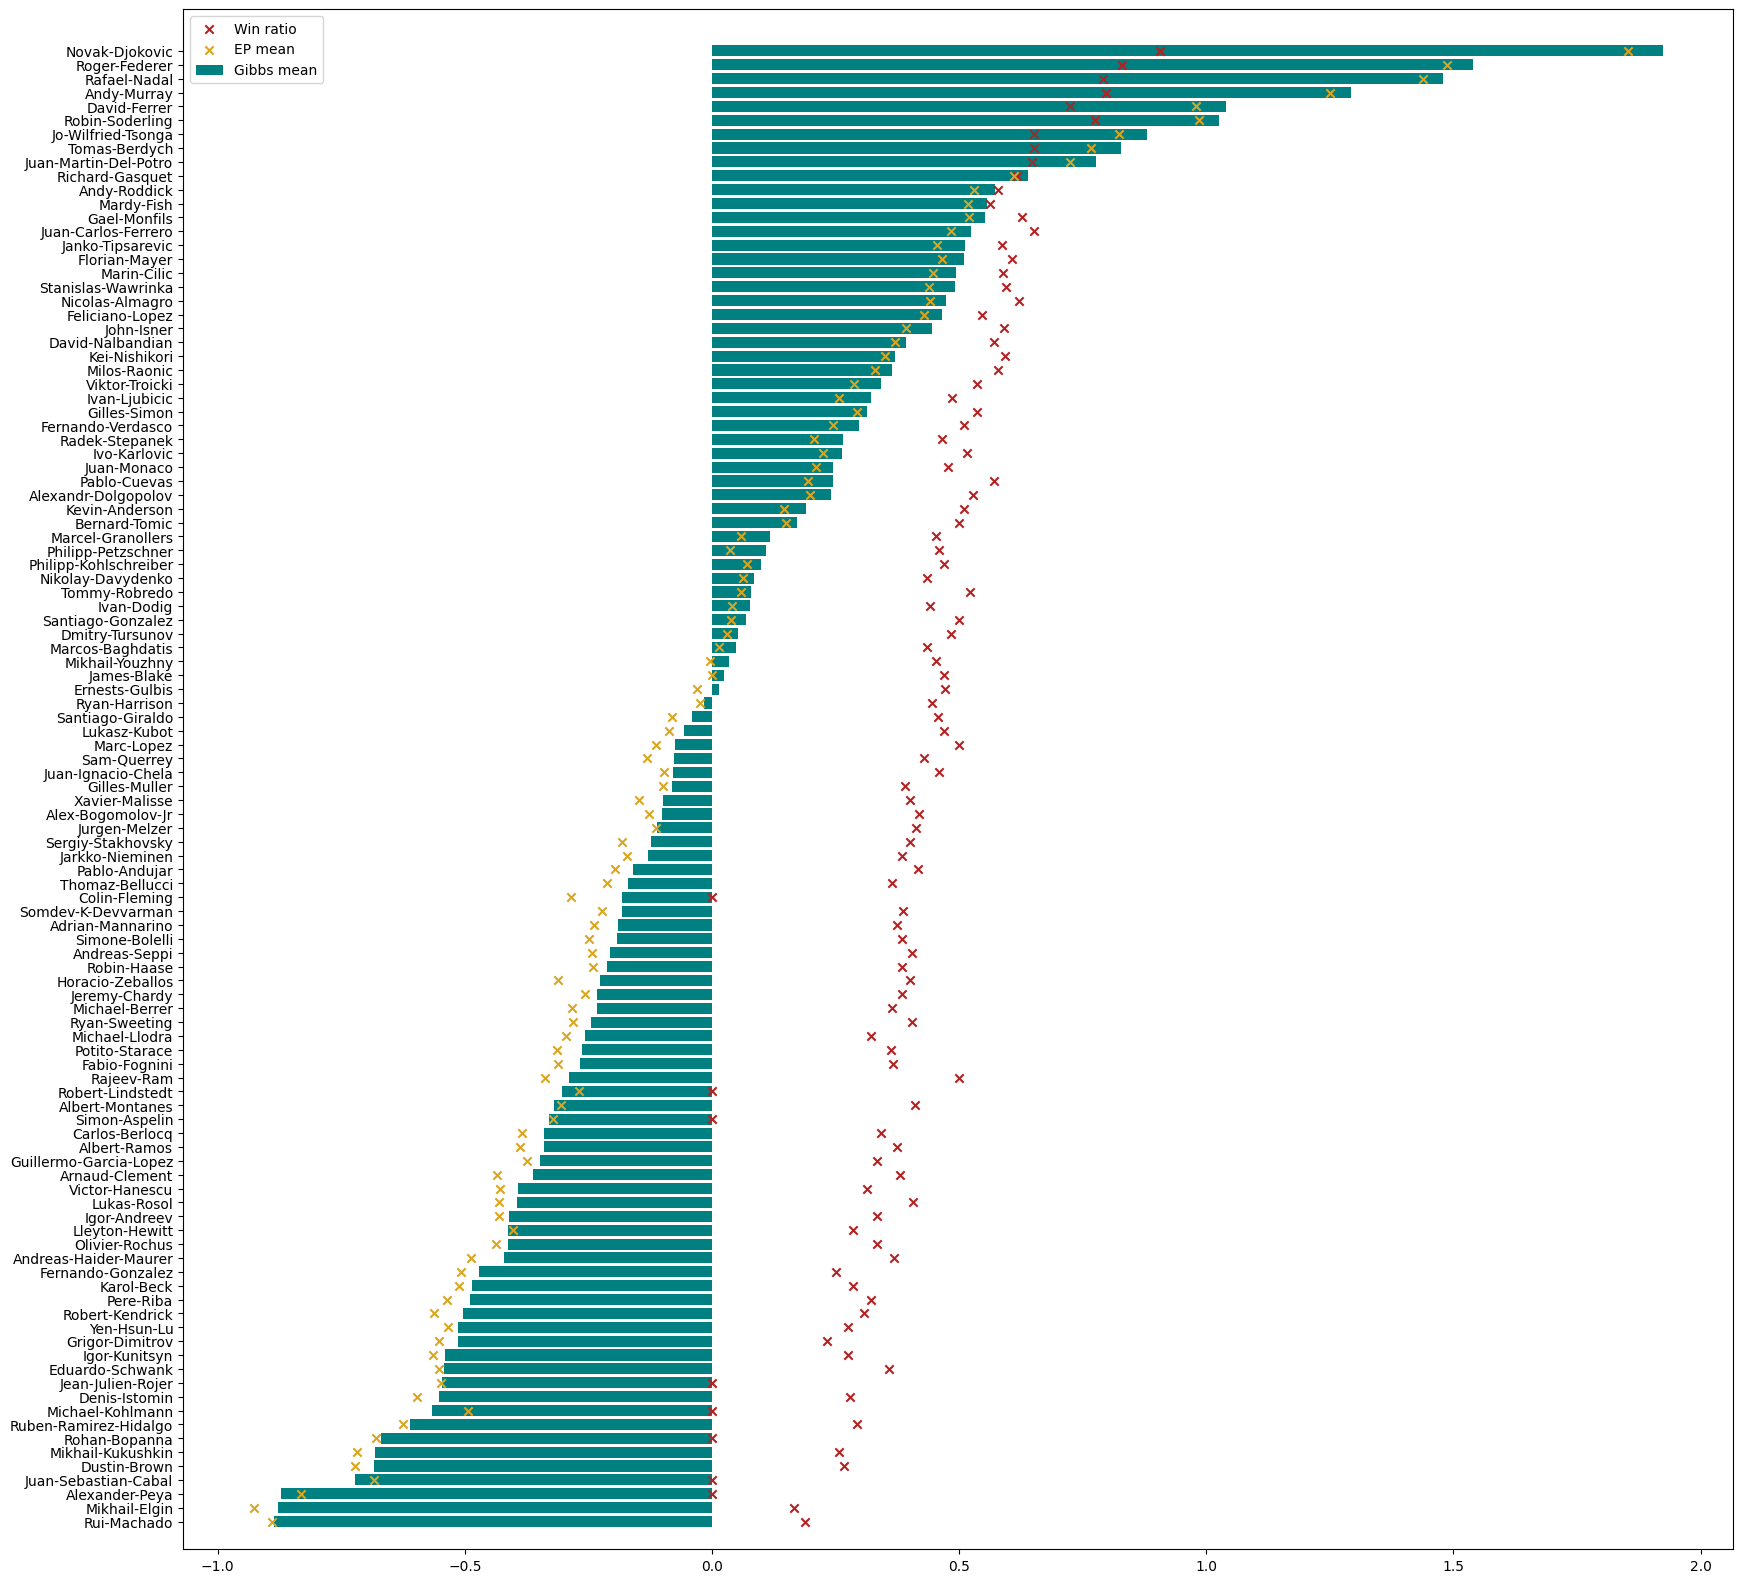

In [72]:
gibbs_rankings = np.argsort(gibbs_means)
sorted_names = W[gibbs_rankings]

xx = np.linspace(0, len(mean_player_skills)-1, len(mean_player_skills))
plt.figure(figsize=(20, 20))
plt.barh(xx, gibbs_means[gibbs_rankings], color="teal", label="Gibbs mean")
plt.scatter(win_ratios[gibbs_rankings], xx, marker="x", color="firebrick", label="Win ratio")
plt.scatter(mean_player_skills[gibbs_rankings], xx, marker="x", color="goldenrod", label="EP mean")
plt.yticks(xx, labels=sorted_names[:, 0])
plt.ylim([-2, 109])
plt.legend()

In [42]:
len(thinned_samples)

107

In [44]:
M

107

In [51]:
gibbs_probs = np.zeros((M, M))
for i in range(M):
    for j in range(M):
        gibbs_probs[j, i] = np.mean(norm.cdf(thinned_samples[i] - thinned_samples[j]))

gibbs_winning_probs = np.zeros(M)
for p in range(M):
    gibbs_winning_probs[p] = np.sum(gibbs_probs[:, p]) / (M - 1) # (M -1) opponents

In [77]:
ep_probs = np.zeros(shape=(M,M))
gibbs_probs = np.zeros((M, M))
for i in range(M):
    for j in range(M):
        gibbs_probs[j, i] = np.mean(norm.cdf(thinned_samples[i] - thinned_samples[j]))
        mean = mean_player_skills[i] - mean_player_skills[j]
        variance = (1 / precision_player_skills[i]) + (1 / precision_player_skills[j]) + 1
        p_win = norm.cdf(mean/ np.sqrt(variance))
        ep_probs[i,j] = p_win

ep_winning_probs = np.zeros(M)
gibbs_winning_probs = np.zeros(M)
for p in range(M):
    gibbs_winning_probs[p] = np.sum(gibbs_probs[:, p]) / (M - 1)
    ep_winning_probs[p] = np.mean(ep_probs[p,:])

Text(0.5, 0, 'Win Probability')

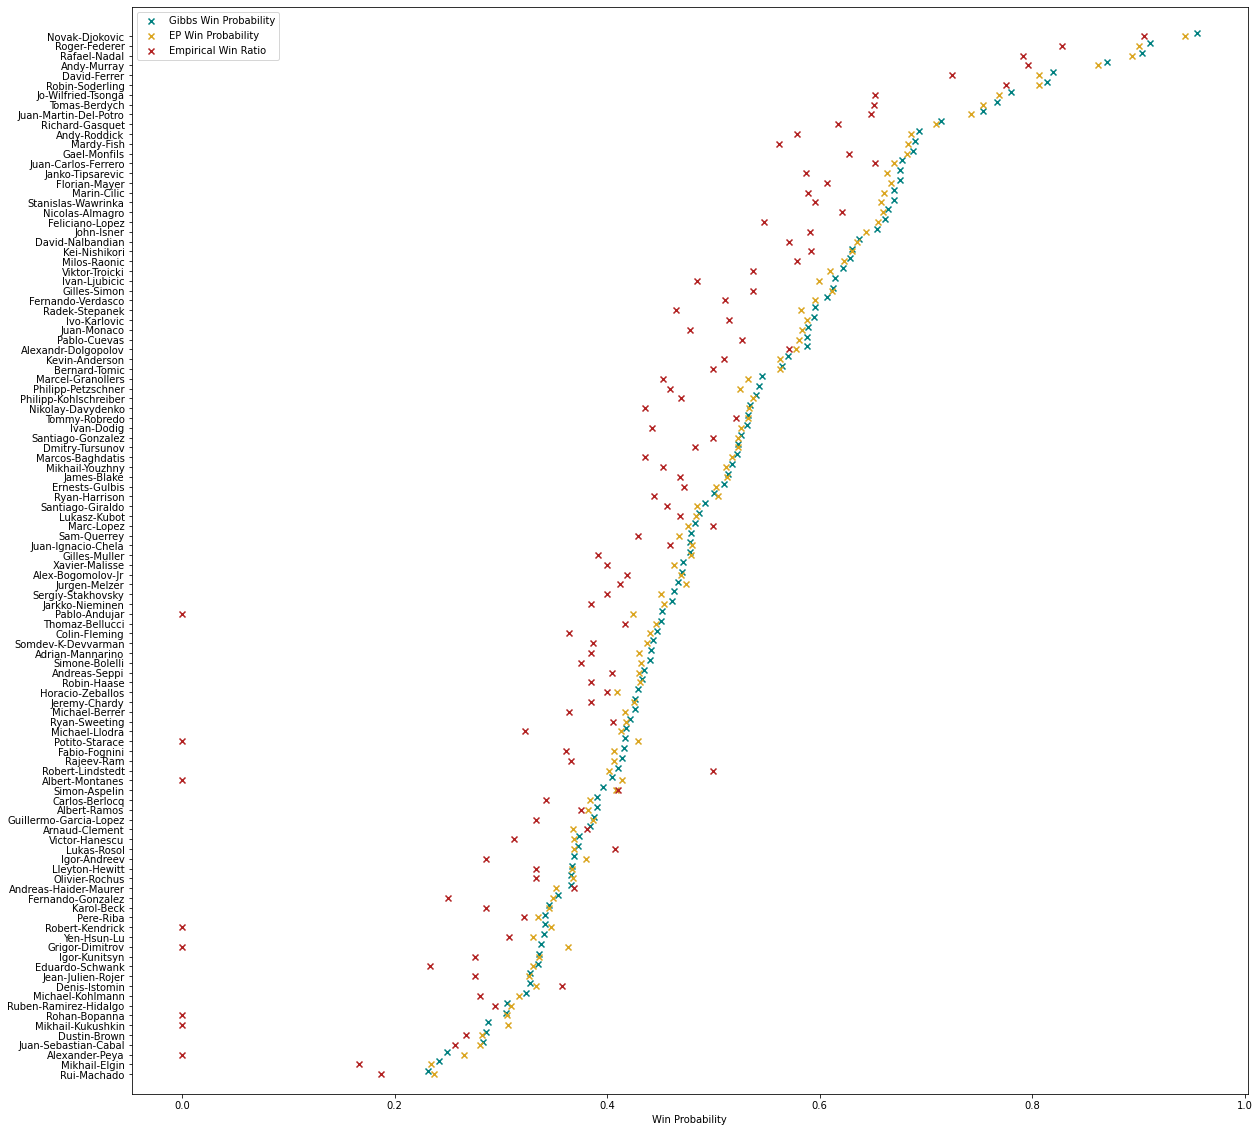

In [68]:
gibbs_rankings_wins = np.argsort(gibbs_winning_probs)
sorted_names_wins = W[gibbs_rankings_wins]

xx = np.linspace(0, len(mean_player_skills)-1, len(mean_player_skills))
plt.figure(figsize=(20, 20))
#plt.barh(xx, gibbs_winning_probs[gibbs_rankings_wins], color="teal", label="Gibbs mean")
plt.scatter(gibbs_winning_probs[gibbs_rankings_wins], xx+0.3, marker="x", color="teal", label="Gibbs Win Probability")
plt.scatter(ep_winning_probs[gibbs_rankings_wins], xx, marker="x", color="goldenrod", label="EP Win Probability")
plt.scatter(win_ratios[gibbs_rankings_wins], xx, marker="x", color="firebrick", label="Empirical Win Ratio")
plt.yticks(xx, labels=sorted_names[:, 0])
plt.ylim([-2, 109])
plt.legend()
plt.xlabel('Win Probability')

In [64]:
gibbs_rankings

array([ 74, 104,  96,  97,  88,  51, 101,  85, 102,  66, 106,  58,  67,
        53,  80,  87,  84,  38,  82,  91,  36,  70,  77,  94,  55,  93,
         6,  72,  50, 103,  90, 105,  95,  43,  73,  27,  18,  83,  92,
        56,  59,  48,  49,  60,  34,  98,  89,  21,  30,  54,  76,  81,
        75,  13,  78,  63, 100,  86,   9,  71,  39,  65,  52,  26,  61,
        99,  17,  69,  40,  68,  64,  45,  37,  62,  32,  57,   1,  35,
        19,  16,  41,  22,  79,   8,  31,  12,  20,  24,  42,  46,  25,
         7,  47,  44,  28,   3,  14,  11,   2,  33,   5,  23,  29,  10,
         0,   4,  15], dtype=int64)

In [66]:
gibbs_rankings_wins

array([ 74, 104,  96,  51,  88,  97, 101,  85,  66,  58,  67,  53,  80,
       102,  87, 106,  84,  38,  82,  91,  77,  36,  70,  94,  55,  93,
         6,  72,  50,  90, 103,  95,  43,  73, 105,  27,  18,  83,  92,
        56,  59,  48,  60,  49,  34,  89,  21,  98,  30,  54,  76,  81,
        75,  13,  78,  63, 100,  86,   9,  71,  39,  65,  52,  26,  61,
        99,  17,  69,  40,  68,  64,  45,  37,  62,  57,  32,   1,  35,
        19,  16,  41,  22,  79,   8,  31,  12,  20,  24,  42,  46,  25,
         7,  47,  44,  28,   3,  14,  11,   2,  33,   5,  23,  29,  10,
         0,   4,  15], dtype=int64)